# Example script for creating data for training

This notebook will describe the process in generating training data for the FCN. There are 2 scripts in the 
preprocessing section of the code, each containing a set of functions. Description for each function resides in the scripts themeselves.

`make_data.py` contains functions to generate variations of the images as well as create data that's readable for the FCN.

`image_parse.py` contains functions to read and parse raw (labels or stem) images.



In this example, we will generate training data from WSeTe simulated images. We will go through some functions and descirbe the meaning of the parameters needed

start by importing the functions in `make_data.py`

In [1]:
from make_data import *

Next we set the parameters. To understand some parameters, we must describe the folder hierarchy that is assumed. The hieararchy is as follows:

input_dir:

    data_dir_0:
        input.ftype 
        label_l0.ftype
        label_l2.ftype
        ...
        label_lm.ftype
    data_dir_2:
        (similar to data_dir_0)
    ...
    data_dir_n:
    
    parsed_dir_name:
        test:
            test_pname1.p
            test_pname2.p
            ...
            test_pnamek.p
        train:
            train_pname1.p
            train_pname2.p
            ...
            train_pnam3.p

Each `data_dir` folder contains its own raw input (stem) image along with its corresponding labels. There is one image corresponding to a label. 
The naming convention of the images MUST be as follows in the `data_dir`. 

(1) the input (stem) image must be called `input.ftype` where `ftype` is the format of the image (jpeg, tiff, png, etc.). 

(2) the label images must be called `label_L.ftype` where `L` is the name of the label (2Te, SeTe, vacancy, etc.), and `ftype` is the same format as `input.ftype`.  

We need to provide the locations and names of `input_dir`, the list of data directories `data_dirs`, the labels in the data directories `label_list`, and the name of the directory where the training data is going `parsed_dir_name`

Note that for `label_list`, it need not contain a list of all the labels in the data directory folders. One just includes the set of labels they wish to train an FCN on. This is usually a list of one element.

In [11]:
input_dir = "../../data/WSeTe/simulated/"
data_dirs = [str(i) for i in range(4)]
label_list = ["Se"]
parsed_dir_name='parsed_label_Se'
ftype = '.tiff'

Next we define parameters of extracting images. If we were to imagine the raw image a sheet of dough, we are getting our training set by cutting out pieces from that sheet. To do this, we need to describe the shape of our cookie cutter, and where on the sheet we are cutting out the pieces.

`l_shape`: the height and width of the images going into the FCN (the size of the cookie cutter)

`stride`: when going through the raw image extracting images of size `l_shape` the stride says how many pixels to move over to the left and down to get the next image. if the stride is equal to the shape, then the set of extracted images have no overlapping pixels. 

In [3]:
l_shape = (256,256)
stride = (64,64)

Preprocessing is performed by cutting a bunch of images from the raw data in various ways and pickling them in a number of pickled files. If our training set is small, we can just deal with one pickeled file by setting `one_pickle` to true. Otherwise, we can specify how many cut images we want in a training batch, `tr_bs` and in a test batch `ts_bs`. 

In [4]:
one_pickle=True
tr_bs = 2000
ts_bs = 200

Suppose we made a lot of cutouts with little to no defects. we can filter this out by setting `ones_percent` to a nonzero value. This value is the percent of pixels that are "on" due to a defect.

In [5]:
ones_percent = .00

The way we parse our label images is that we take in the label file, and set pixel values above `tol` to 1 and pixel values below `tol` to zero. This is set below

In [6]:
tol = 0.05

The final parameter is a debugging tool to take a look at these cutouts to make sure that everything is in order. Only set `show_plots` to true to verify that training data is what we expect

In [7]:
show_plots=False

Now that we set all the parameters, we can run functions to generate training data. The first of these is `create_augments`. This function will take the input images in a data directory, and output augments of that image in a folder inside `data_dir/` called `augments`. The types of augments are inversions, rotations, and down/up sampling. 
Hence for a single input image, the augments create 2*4*3 = 24 different input images.

In [8]:
#create_augments(input_dir, data_dirs, ftype)

creating augments in 0
inverting
rotating
magnifying
creating augments in 1
inverting
rotating
magnifying
creating augments in 2
inverting
rotating
magnifying
creating augments in 3
inverting
rotating
magnifying


Finally, we make the data that will be placed in `parsed_dir_name`

In [12]:
make_data(input_dir, label_list, data_dirs, l_shape, stride, ftype,\
        parsed_dir_name=parsed_dir_name, tr_bs=tr_bs, ts_bs=ts_bs, ones_percent=ones_percent, \
        tol=tol, show_plots=show_plots, one_save=one_pickle)

0
mag1_rot0_orig
mag2_rot1_orig
mag2_rot0_flip
mag0_rot0_orig
mag2_rot2_orig
mag2_rot3_flip
mag2_rot0_orig
mag0_rot3_flip
mag2_rot2_flip
mag0_rot1_orig
mag2_rot3_orig
mag0_rot1_flip
mag2_rot1_flip
mag1_rot2_flip
mag0_rot3_orig
mag1_rot1_flip
mag0_rot2_orig
mag1_rot1_orig
mag1_rot3_orig
mag0_rot2_flip
mag0_rot0_flip
mag1_rot3_flip
mag1_rot0_flip
mag1_rot2_orig
4056 total examples
1
mag1_rot0_orig
mag2_rot1_orig
mag2_rot0_flip
mag0_rot0_orig
mag2_rot2_orig
mag2_rot3_flip
mag2_rot0_orig
mag0_rot3_flip
mag2_rot2_flip
mag0_rot1_orig
mag2_rot3_orig
mag0_rot1_flip
mag2_rot1_flip
mag1_rot2_flip
mag0_rot3_orig
mag1_rot1_flip
mag0_rot2_orig
mag1_rot1_orig
mag1_rot3_orig
mag0_rot2_flip
mag0_rot0_flip
mag1_rot3_flip
mag1_rot0_flip
mag1_rot2_orig
4056 total examples
2
mag1_rot0_orig
mag2_rot1_orig
mag2_rot0_flip
mag0_rot0_orig
mag2_rot2_orig
mag2_rot3_flip
mag2_rot0_orig
mag0_rot3_flip
mag2_rot2_flip
mag0_rot1_orig
mag2_rot3_orig
mag0_rot1_flip
mag2_rot1_flip
mag1_rot2_flip
mag0_rot3_orig
mag1_rot1

Now if we want to check our data, we use the function `check_data`:

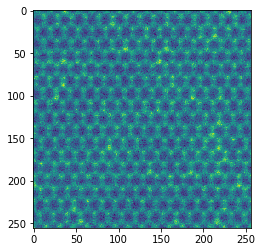

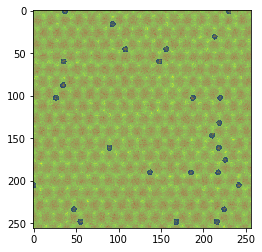

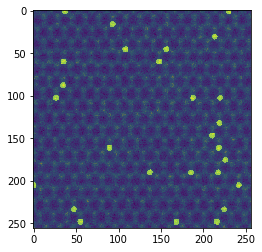

In [10]:
import numpy as np
from make_data import *
parsed_fn = input_dir + parsed_dir_name + "/train/train_0.p"
check_data(parsed_fn, l_shape=l_shape) 